In [143]:
import pickle
from Data.Featurisation import data_handeler
import pandas as pd
import numpy as np
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

In [144]:
installation_int = 0

In [145]:
with open(f"DA_forecasts/DA_1_{installation_int}.pkl", 'rb') as f:
    DA_forecast = pickle.load(f)

prodNL = pd.read_parquet('Data/production.parquet', engine='pyarrow')
installation_id = "3437BD60"    
actuals_15min = prodNL.loc[installation_id]
is_day = pd.read_pickle(f"Data/Sites/is_day_{installation_int}.pkl")

In [146]:
_,_, eval_data = data_handeler(installation_int, "nwp", "nwp", "nwp", transform=True)
power = eval_data['P']

Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


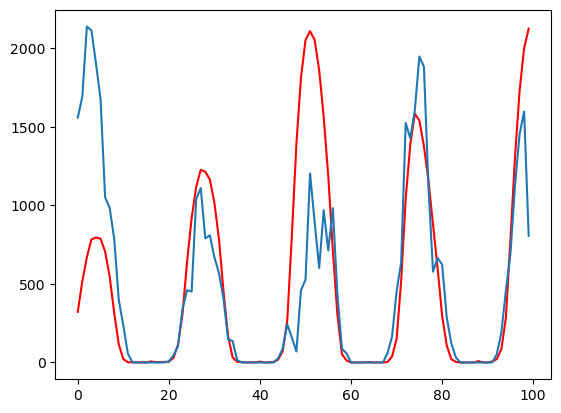

In [147]:
plt.plot(DA_forecast[800:900], color="red")
plt.plot(power.values[800:900])

In [148]:
DA_forecast = pd.Series(data=DA_forecast, index=eval_data.index[24:])
#DA_forecast.resample("15min").interpolate()


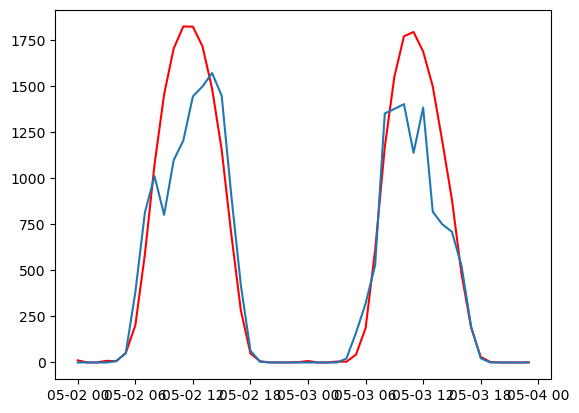

In [149]:
plt.plot(DA_forecast["2020-05-02":"2020-05-03"], color="red")
plt.plot(power["2020-05-02":"2020-05-03"])

In [150]:
DA_forecast.name = "P_DA"
actuals_15min = actuals_15min.tz_localize("UTC")
research = pd.merge(actuals_15min, DA_forecast, right_index=True, left_index=True)
research["error"] = research["watt"] - research["P_DA"]
research

,watt,P_DA,error
2020-05-02 00:00:00+00:00,0.0,11.437740,-11.437740
2020-05-02 01:00:00+00:00,0.0,0.107312,-0.107312
2020-05-02 02:00:00+00:00,0.0,0.000000,0.000000
2020-05-02 03:00:00+00:00,0.0,8.853535,-8.853535
2020-05-02 04:00:00+00:00,0.0,6.781904,-6.781904
...,...,...,...
2021-04-30 19:00:00+00:00,4.0,3.708033,0.291967
2021-04-30 20:00:00+00:00,0.0,0.907388,-0.907388
2021-04-30 21:00:00+00:00,0.0,0.000000,0.000000
2021-04-30 22:00:00+00:00,0.0,0.634077,-0.634077


(0.0, 20.0)

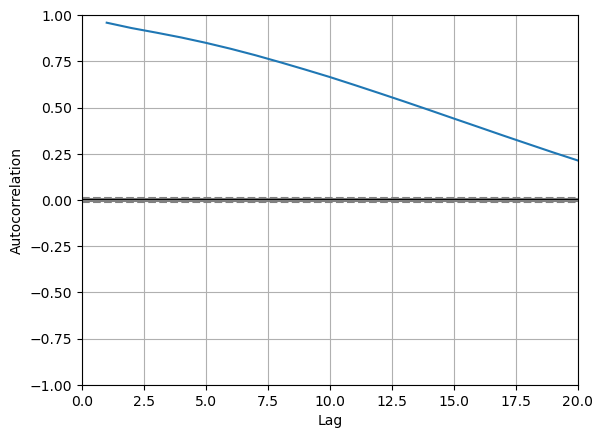

In [151]:

ax = autocorrelation_plot(actuals_15min)
ax.set_xlim([0,20])

(0.0, 20.0)

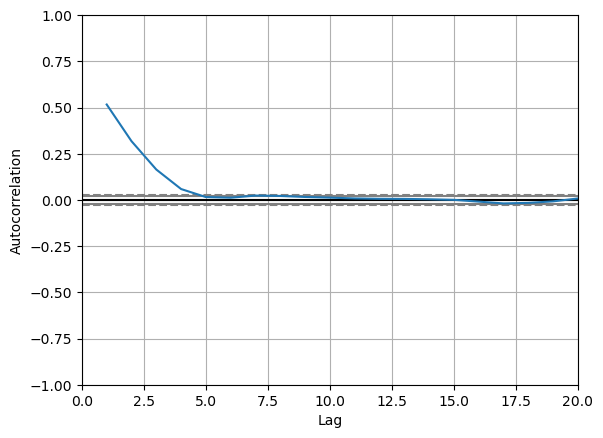

In [152]:
ax = autocorrelation_plot(research["error"])
ax.set_xlim([0,20])

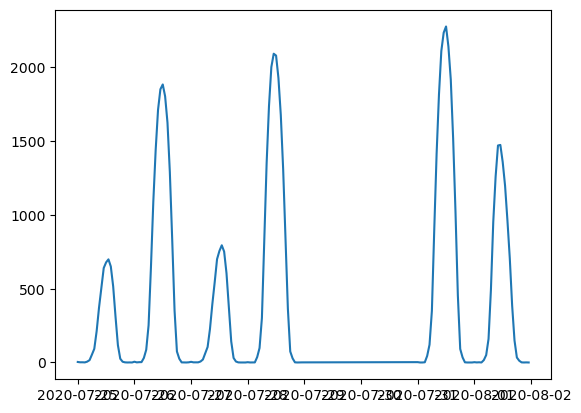

In [153]:
plt.plot(DA_forecast["2020-07-25":"2020-08-01"])

In [154]:
DA_forecast[is_day]

TypeError: Indexing a Series with DataFrame is not supported, use the appropriate DataFrame column

In [ ]:
np.sqrt(((research["error"] - research.error.shift(-1, fill_value=0))**2).mean())
np.sqrt(((power - power.shift(-1, fill_value=0))**2).mean())

246.19055103649094

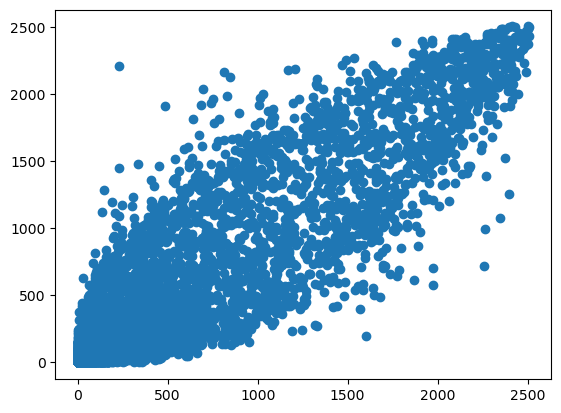

In [ ]:
plt.scatter(power, power.shift(-1, fill_value=0))